In [2]:
import numpy as np
import awkward as ak
import matplotlib.pyplot as plt
import xtrack as xt
from pathlib import Path

In [19]:
file = ak.from_parquet(Path('/Users/lisepauwels/sps_simulations/MD_data/20250616/abwlm/SPS.USER.MD2/2025.06.16.20.04.44.893407.parquet'))

In [31]:
file['ABWLMSPS/Acquisition']['value']['acqTimeFromInj'][0]

<Array [0, 20, 40, 60, ..., 5.22e+03, 5.24e+03, 5.26e+03] type='264 * ?float64'>

In [35]:
file['ABWLMSPS/Acquisition']['value']['bunchLengths'][0][0]

<Array [3.8e-09, 0, 0, 0, 0, 0, 0, ..., 0, 0, 0, 0, 0, 0] type='288 * ?float32'>

In [47]:
file['ABWLMSPS/Acquisition']['value']['nAcqsPresent']

<Array [264] type='1 * ?int32'>

In [57]:
file['ABWLMSPS/Acquisition']['value']['bunchLengthMean'][0]

<Array [3.8e-09, 3.89e-09, 3.94e-09, ..., 0, 0, 0] type='264 * ?float32'>

I think 288 is the number of bunch spots in the ring, but basically I only have one readout because one bunch so I can just take the bunchlengthMean because zero values have zero weight 

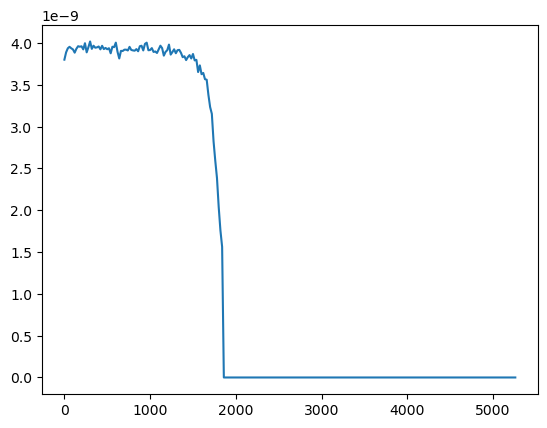

In [59]:
plt.plot(file['ABWLMSPS/Acquisition']['value']['acqTimeFromInj'][0],file['ABWLMSPS/Acquisition']['value']['bunchLengthMean'][0])

In [64]:
nnz = np.nonzero(file['ABWLMSPS/Acquisition']['value']['bunchLengthMean'][0])[0][-1]

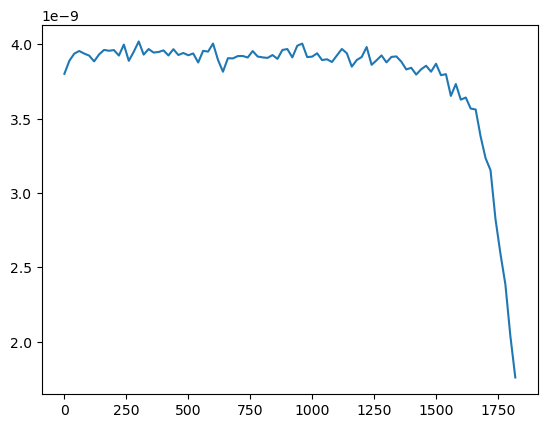

In [73]:
plt.plot(file['ABWLMSPS/Acquisition']['value']['acqTimeFromInj'][0][:nnz],file['ABWLMSPS/Acquisition']['value']['bunchLengthMean'][0][:nnz])

In [76]:
m = np.max(file['ABWLMSPS/Acquisition']['value']['bunchLengthMean'][0][:nnz])

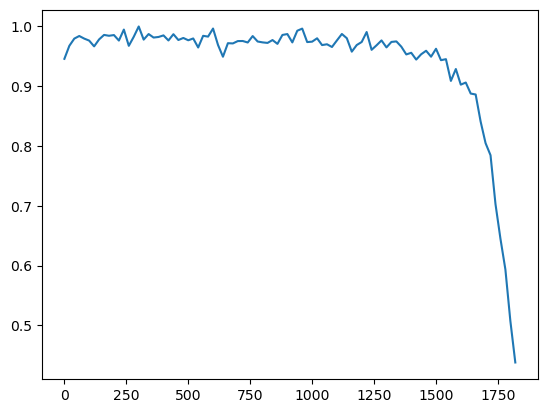

In [77]:
plt.plot(file['ABWLMSPS/Acquisition']['value']['acqTimeFromInj'][0][:nnz],file['ABWLMSPS/Acquisition']['value']['bunchLengthMean'][0][:nnz]/m)

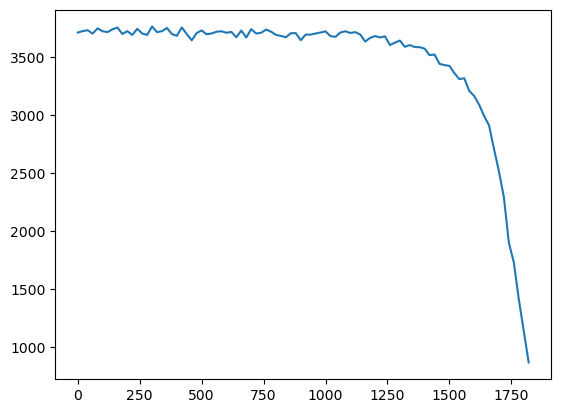

In [85]:
plt.plot(file['ABWLMSPS/Acquisition']['value']['acqTimeFromInj'][0][:nnz],file['ABWLMSPS/Acquisition']['value']['bunchIntensities'][0][:,0][:nnz])

In [86]:
m_int = np.max(file['ABWLMSPS/Acquisition']['value']['bunchIntensities'][0][:,0][:nnz])

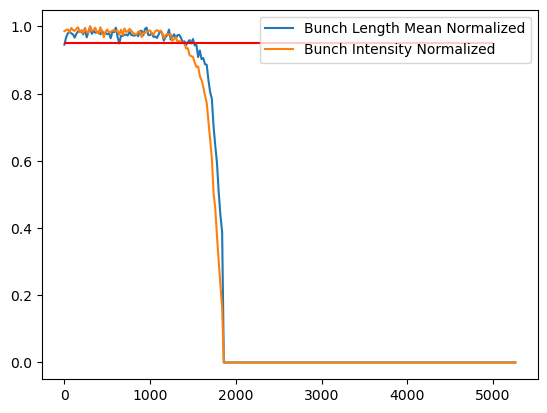

In [90]:
plt.plot(file['ABWLMSPS/Acquisition']['value']['acqTimeFromInj'][0], file['ABWLMSPS/Acquisition']['value']['bunchLengthMean'][0]/m, label='Bunch Length Mean Normalized')
plt.plot(file['ABWLMSPS/Acquisition']['value']['acqTimeFromInj'][0], file['ABWLMSPS/Acquisition']['value']['bunchIntensities'][0][:,0]/m_int, label='Bunch Intensity Normalized')
plt.hlines(0.95, 0, 5000, color='red')
plt.legend()

In [92]:
np.min(np.where(file['ABWLMSPS/Acquisition']['value']['bunchIntensities'][0][:,0]/m_int < 0.95))

np.int64(70)

In [94]:
np.max(np.where(file['ABWLMSPS/Acquisition']['value']['bunchIntensities'][0][:,0]/m_int > 0))

np.int64(92)

In [95]:
70/92

0.7608695652173914

In [98]:
np.mean(file['ABWLMSPS/Acquisition']['value']['bunchLengthMean'][0][:,0]/m)

IndexError: cannot slice NumpyArray (of length 264) with (array(0)): too many indices for array: array is 1-dimensional, but 2 were indexed

In [104]:
file['ABWLMSPS/Acquisition']['value']['bunchLengths'][0][:,0]

<Array [3.8e-09, 3.89e-09, 3.94e-09, ..., 0, 0, 0] type='264 * ?float32'>

In [112]:
np.mean(file['ABWLMSPS/Acquisition']['value']['bunchLengthMean'][0][:92]/m / file['ABWLMSPS/Acquisition']['value']['bunchIntensities'][0][:,0][:92]/m_int)

np.float64(7.366021315607688e-08)

In [111]:
file['ABWLMSPS/Acquisition']['value']['bunchIntensities'][0][:,0][:92]/m_int / file['ABWLMSPS/Acquisition']['value']['bunchLengthMean'][0][:92]/m

<Array [6.45e+16, 6.33e+16, ..., 3.68e+16, 3.25e+16] type='92 * ?float32'>

# Sanity checks for the files

In [121]:
if file['ABWLMSPS/Acquisition']['value']['acquisitionDone'][0]:
    print('Acquisition done')
else:
    print('Acquisition not done')

Acquisition done


In [123]:
file['ABWLMSPS/Acquisition']['value']

<Array [{acqTimeFromInj: [0, ...], ...}] type='1 * ?{acqTimeFromInj: option...'>